# Translational kinetic energy

[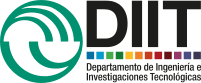](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)

---

## Definition
The kinetic energy of a point object with mass $m$ is 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right), 
$$
As an example, in a Cartesian frame of reference we get
$$
T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right) .
$$

## How do we write this in Python code?
Remember that Python is an interactive language so we can run parts of a program, review and modify variables and then execute other parts.
This takes place in a _session_ that begins when you start the interactive _interpeter_ until memory contents are erased.

The first thing we are going to execute in a session is the _import_ of the function libraries for mechanics, the part of physics that concerns us in this course.

In [1]:
import sympy as sym # import functions for symbolic manipulations
from sympy.physics import mechanics as mech # from sympy we use functions for mechanics
mech.init_vprinting() # dot notation for velocity and acceleration

We will use functions to define a frame of reference in Cartesian coordinates and the relevant variable for the position of a point particle of mass $m_1$.
We will place such a particle on the $x$ axis, which allows us to determine its position with only one, $x$,
$$
\begin{aligned}
\vec{r}_1 
&= x \hat{e}_x.
\end{aligned}
$$

In [2]:
m1 = sym.symbols('m_1', positive=True) # masses are always positive
e = mech.ReferenceFrame('e') # Cartesian frame of reference
x = mech.dynamicsymbols('x') # x changes with time, thus it is a dynamic variable

In [3]:
m1_r = x* e.x
m1_r

[Python] (https://www.python.org/), like any other programming language, is capable of doing calculations like a calculator.
This is called numerical calculation.
On the other hand, the [SymPy](https://www.sympy.org/en/index.html) library allows you to operate in symbolic form, enabling you to solve questions of calculus and algebra.
For example, it allows you to find the derivative of the position of the mass particle $m_1$ as a function of time
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [4]:
m1_v= m1_r.dt(e) # finds the derivative as a function of time in the frame of reference e
m1_v

Since velocities are vectors, it is practical to calculate the square of the velocities using the dot product
$$
\left( \dot{\vec{r}} \right)^2 = \dot{\vec{r}} \cdot \dot{\vec{r}} .
$$

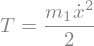

In [5]:
# Kinetic energy
oneHalf = sym.Rational(1,2) # Rational: a fraction
m1_T = oneHalf* m1* m1_v.dot(m1_v)
T = sym.Eq(sym.Symbol('T'), m1_T ) # Eq defines an equation
T

### System of particles

To obtain $T$ of a system with $N$ particles you have to add all their $T$'s. E.g. for a system with two particles
$$
T = \sum_{i=1}^{N=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

In case we want to define more than one dynamic variable, just add it directly in line 4 above. For example, we can define $x_1$ and $x_2$ like this
`x1, x2 = mech.dynamicsymbols('x_1, x_2')`

In [6]:
# Parameters for this system, i.e. the masses
m1, m2 = sym.symbols('m_1, m_2', positive=True)

In this case we call the reference frame "N", however we can use any notation that we find comfortable, for example:
`e = mech.ReferenceFrame('e')`
in this case we would use the notation `x_1*(e.x)` to indicate $x_1 \hat{e}_x$

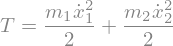

In [7]:
# Positions
E = mech.ReferenceFrame('e')
x1, x2 = mech.dynamicsymbols('x_1, x_2')
m1_r = x1* e.x # m1_r : for mass 1 and its position r
m2_r = x2* e.x 

# Velocities
m1_v= m1_r.dt(e)
m2_v= m2_r.dt(e)

# Kinetic energy
oneHalf = sym.Rational(1,2) # Rational: a fraction. We could also use 0.5 
m1_T = oneHalf* m1* m1_v.dot(m1_v)
m2_T = oneHalf* m2* m2_v.dot(m2_v)
T = sym.Eq(sym.Symbol('T'), m1_T + m2_T )
T

We end up repeating identical lines of code, something that can be avoided in any programming language.

With all that has been covered so far, the problems listed in the worksheet can be solved.

As a reference, we will solve one of these below.

## An exercise done from the beginning | Pendulum with free point of support

> Bibliography:
>- Section 5 ($\S 5$) Exercise 2  
Mechanics  
Lev Davidovich Landau and E. M. Lifshitz  
Institute of physical problems, USSR Academy of Sciences, 1976

### Problem

A simple pendulum of mass $m_2$, with a mass $m_1$ at the point of support which can move on a horizontal line lying in the plane in which $m_2$ moves.

The string connecting masses $m_1$ and $m_2$ does not bend, so the distance $
\ell$ is constant.

Write the kinetic energy, $T$, as a function of the coordinates indicated in the figure: $x, \phi$.

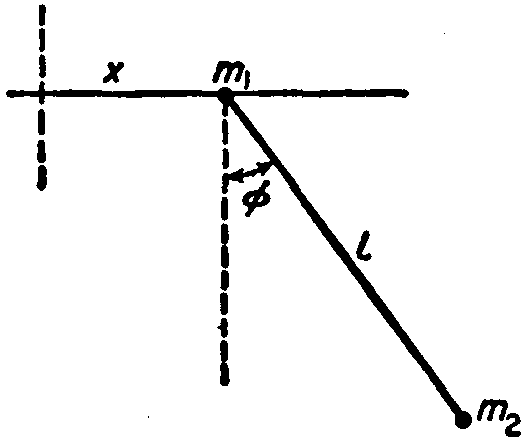

### Positions

We import the function libraries to be added to the basic Python libraries.

In [8]:
# Import functions for mechanics from Sympy
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting()

We define a frame of reference.

In [9]:
e = mech.ReferenceFrame('e')

The position of particle with mass $m_1$, that is $\vec{r}_1$

In [10]:
# position of particle 1
x = mech.dynamicsymbols('x')
m1_r = x* e.x
m1_r

Particle of mass $m_2$ is always at a distance $\ell$ from $m_1$.
Its position is defined from the latter.
You only have to make the projection in the frame of reference based on the coordinate $\phi$,
$$
\begin{aligned}
\vec{r}_2 
&= \vec{r}_1 + \ell \left( \sin{(\phi)} \hat{x} +  \cos{(\phi)} (- \hat{y}) \right) \\
&= \left( \ell \sin{(\phi)} + x \right) \hat{x} -\ell \cos{(\phi)}  \hat{y}.
\end{aligned}
$$

Describing the positions as a function of geometry is the **central procedure** for the resolution of this problem. 

The length of the pendulum is a characteristic of the system that **does not vary** over time.
The same happens with the masses.
They are **not variables**, so it makes no sense to declare them as such, but they are symbols that the code must be able to operate with.

In [11]:
# We define the parameters for this system
m1, m2, l = sym.symbols('m_1, m_2, \ell', positive=True) 

Declaring $\phi$ as a variable and making use of SymPy's trigonometric functions allows you to write the position of the particle with mass $m_2$.

In [12]:
# position of particle 2
phi = mech.dynamicsymbols('phi')
m2_r = m1_r + l*( sym.sin(phi)* e.x + sym.cos(phi)* (-e.y) )  # y unit vector points upward

### Velocities

Finding the derivative of the position of particle with mass $m_1$ as a function of time to find its velocity
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [13]:
t = sym.Symbol('t')

In [14]:
m1_v= m1_r.diff(t, e) # diff: derivative respect to t in frame of reference e
m1_v

And for the derivative of the position of particle with mass $m_2$,
$$
\dot{\vec{r}}_2 = \left( \ell \cos{(\phi)} \dot{\phi} + \dot{x} \right) \hat{x} + \ell \sin{(\phi)} \dot{\phi} \hat{y} ,
$$
Sympy correctly applies the chain rule for the trigonometric functions.

In [15]:
m2_v= m2_r.diff(t, e)
m2_v

### Translational kinetic energy
Kinetic energy of particle with mass $m$ is
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right) .
$$

In this exercise, using Cartesian coordinates, it's $T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right)$.

We need $T$ for the system.
There are two particles in this system, we must add both,
$$
T = \sum_{i=1}^{P=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

So we need the square of the velocities
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [16]:
# square of velocities, that is the dot product with itself
m1_v_squared = m1_v.dot(m1_v)
m1_v_squared

$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\phi} \dot{\phi} \right)^2 + \left( \ell \sin{\phi} \dot{\phi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\phi} \dot{\phi} + \ell^2 \cos^2{\phi} \dot{\phi}^2 \right) + \left( \ell^2 \sin^2{\phi} \dot{\phi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\phi} \dot{\phi} + \ell^2 \dot{\phi}^2 . 
\end{aligned}
$$

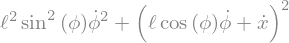

In [17]:
m2_v_squared = m2_v.dot(m2_v)
m2_v_squared

Thus, the kinetic energy is
$$
\begin{aligned}
T(\dot{x}_1, \phi, \dot{\phi}) &= \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 \\
& = \frac{m_1}{2} \dot{x}^2 + \frac{m_2}{2} \left( \dot{x}^2 + 2 \dot{x} \ell \cos{\phi} \dot{\phi} + l^2 \dot{\phi}^2 \right) \\
\end{aligned}
$$

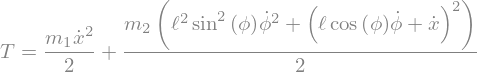

In [18]:
# Kinetic energy
oneHalf = sym.Rational(1,2)
m1_T = oneHalf* m1* m1_v_squared
m2_T = oneHalf* m2* m2_v_squared
T = sym.Eq(sym.Symbol('T'), (m1_T + m2_T) )
T

As can be seen, the greatest effort involved in solving the problem is to describe the position of the particles as a function of the geometry of the system.

### Work saved: calculation of velocities

The exercise is finished. Below you will see all the calculations that we saved by handing them to 'SymPy'.

Derivative of the position of particle with mass $m_1$.

In [19]:
m1_r

is a trivial exercise.

In [20]:
m1_v= m1_r.dt(e)
m1_v

But the position for the other particle

In [21]:
m2_r

has a more complex expression, so deriving it implies applying derivatives of trigonometric functions and applying the chain rule.
$$
\dot{\vec{r}}_2 = \left( \ell \cos{(\phi)} \dot{\phi} + \dot{x} \right) \hat{x} + \ell \sin{(\phi)} \dot{\phi}  \hat{y} ,
$$

In [22]:
m2_v= m2_r.dt(e)
m2_v

For calculating the kinetic energy we need the square of the velocities.
For particle 1
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [23]:
m1_v_squared = m1_v.dot(m1_v)
m1_v_squared

But the second particle requires more effort
$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\phi} \dot{\phi} \right)^2 + \left( \ell \sin{\phi} \dot{\phi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\phi} \dot{\phi} + \ell^2 \cos^2{\phi} \dot{\phi}^2 \right) + \left( \ell^2 \sin^2{\phi} \dot{\phi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\phi} \dot{\phi} + \ell^2 \dot{\phi}^2 . 
\end{aligned}
$$

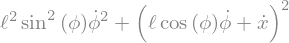

In [24]:
m2_v_squared = m2_v.dot(m2_v)
m2_v_squared

This last expression can be made clearer by expanding the square of what is inside parentheses and taking advantage of the pythagorean identity.

In [25]:
m2_v_squared.simplify()

A student who takes this course has already shown that he knows how to do all this, because he passed the previous required courses.
Just as using a pocket calculator saves the time it would take to manually perform the arithmetic learned in elementary school, the `SymPy` library does the same in relation to algebra and symbolic analysis.

### The principle of least effort: programming to work less

There are **two particles** in the system.
We wrote **twice** the same commands to calculate the velocities, their squares and kinetic energies.
An unnecessary repetition since a general programming language such as Python is available.

It is enough to **define a function** that calculates kinetic energy by indicating in it:
- inputs: mass $m$ and particle position $\vec{r}$ in a given frame of reference
- intermediate processes that must be performed from the inputs to calculate the kinetic energy such as $\frac{m}{2} \dot{r}^2$
- output: what it will return, which is written after
```Python
return
```

The cell below contains the code that defines the function `translationalKineticEnergy`. A comment can be included between triple double quotation marks to explain what the defined function does.

In [26]:
def translationalKineticEnergy(mass, position, frameOfReference):
    """
    From mass and position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of a particle
    position: (sympy.physics.vector.vector.Vector)
        of particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which position is expressed
    
    Returns
    -------
    Equality Sympy (sympy.core.relational.Equality)
        On the right hand side, it explains the kinetic energy of the system as a function of generalized coordinates, velocities and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sym.Rational(1,2)
    T_translational = sym.Eq(
        sym.Symbol('T_{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

Thus, for the particle with mass `m1` whose position is `m1_r` in the frame of reference `e` we obtain that

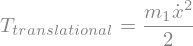

In [27]:
m1_T = translationalKineticEnergy(m1, m1_r, e)
m1_T

Applying the function to the problem of the two particles of masses `m1` and `m2` this is

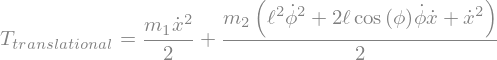

In [28]:
m1_T = translationalKineticEnergy(m1, m1_r, e)
m2_T = translationalKineticEnergy(m2, m2_r, e)
sym.Eq(m1_T.lhs, (m1_T.rhs + m2_T.rhs).simplify() ) # rhs: right hand side